# Spam Mail Prediction Model.

In [359]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [360]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('mail_data.csv')

In [361]:
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [362]:
dataset.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [363]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [364]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [365]:
#  Check the dimension of the dataset.
mail_data.shape

(5572, 2)

In [366]:
#  here we have the duplicate value in our dataset.
mail_data.duplicated().sum()

415

In [367]:
#  Label Encoding Operation.
mail_data.replace({"Category": {"ham": 1, "spam": 0}}, inplace=True)

In [368]:
mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [369]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [370]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [371]:
# Splitting the data into the training and the testing.

In [372]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [373]:
print(x.shape, x_train.shape, x_test.shape)

(5572, 1) (4457, 1) (1115, 1)


<Axes: ylabel='count'>

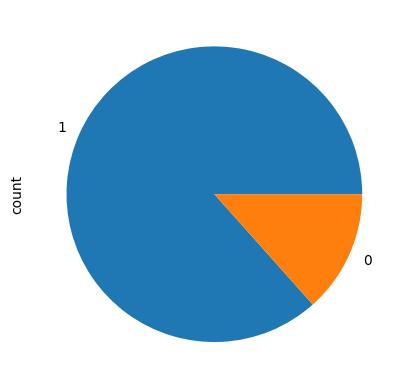

In [374]:
mail_data["Category"].value_counts().plot.pie()

# Feature Extraction.


In [375]:
type(X_train)

pandas.core.series.Series

In [376]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [377]:
# Trained the Logistic Regression Model.
model = LogisticRegression()

In [378]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [379]:
#  Evaluate the Training Model.

In [380]:
#  Prediction the Training Model.
train_accu = accuracy_score(model.predict(X_train_features), Y_train)
test_accu = accuracy_score(model.predict(X_test_features), Y_test)


print(train_accu * 100)
print(test_accu * 100)

96.76912721561588
96.68161434977578


In [381]:
# 

In [389]:
#  Build the Predictive System for the Model.
new_mail = ["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
# new_mail = [["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]]
# print(type(new_mail))
# print(new_mail.ndim)

# print(new_mail)

new_vectorizer = feature_extraction.transform(new_mail)

# print(new_vectorizer)
prediction = model.predict(new_vectorizer)

print(prediction)




[0]
